In [153]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [154]:
df = pd.read_csv('WSBRedditSentiment.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 13 columns):
Unnamed: 0    365 non-null object
title         365 non-null object
title.1       365 non-null object
title.2       365 non-null object
title.3       365 non-null object
body          365 non-null object
body.1        365 non-null object
body.2        365 non-null object
body.3        365 non-null object
comments      365 non-null object
comments.1    365 non-null object
comments.2    365 non-null object
comments.3    365 non-null object
dtypes: object(13)
memory usage: 37.3+ KB


In [155]:
df.tail()

,Unnamed: 0,title,title.1,title.2,title.3,body,body.1,body.2,body.3,comments,comments.1,comments.2,comments.3
361,2020-04-16,6,10,2.766,3.0439999999999996,61,46,1.32,1.242,3590,2639,973.9200000000016,748.4120000000017
362,2020-04-17,8,5,3.2770000000000006,1.78,30,36,1.2469999999999999,0.7499999999999999,2729,2055,731.132999999999,537.2109999999999
363,2020-04-18,9,7,1.598,1.3800000000000001,67,69,1.215,1.029,2189,1614,657.7929999999998,507.6059999999997
364,2020-04-19,3,8,1.431,3.544,23,22,1.033,1.032,2823,2355,924.8380000000025,810.4729999999993
365,2020-04-20,8,6,1.984,2.9909999999999997,30,28,0.751,0.546,2516,1960,828.5940000000006,698.5569999999999


In [156]:
df.columns = ['Date', 'Title_Bull', 'Title_Bear', 'Title_Pos', 'Title_Neg', 
                      'Body_Bull', 'Body_Bear', 'Body_Pos', 'Body_Neg',
                      'Comments_Bull', 'Comments_Bear', 'Comments_Pos', 'Comments_Neg',]

In [157]:
df.tail()

,Date,Title_Bull,Title_Bear,Title_Pos,Title_Neg,Body_Bull,Body_Bear,Body_Pos,Body_Neg,Comments_Bull,Comments_Bear,Comments_Pos,Comments_Neg
361,2020-04-16,6,10,2.766,3.0439999999999996,61,46,1.32,1.242,3590,2639,973.9200000000016,748.4120000000017
362,2020-04-17,8,5,3.2770000000000006,1.78,30,36,1.2469999999999999,0.7499999999999999,2729,2055,731.132999999999,537.2109999999999
363,2020-04-18,9,7,1.598,1.3800000000000001,67,69,1.215,1.029,2189,1614,657.7929999999998,507.6059999999997
364,2020-04-19,3,8,1.431,3.544,23,22,1.033,1.032,2823,2355,924.8380000000025,810.4729999999993
365,2020-04-20,8,6,1.984,2.9909999999999997,30,28,0.751,0.546,2516,1960,828.5940000000006,698.5569999999999


In [158]:
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, nan to 2020-04-20
Data columns (total 12 columns):
Title_Bull       365 non-null object
Title_Bear       365 non-null object
Title_Pos        365 non-null object
Title_Neg        365 non-null object
Body_Bull        365 non-null object
Body_Bear        365 non-null object
Body_Pos         365 non-null object
Body_Neg         365 non-null object
Comments_Bull    365 non-null object
Comments_Bear    365 non-null object
Comments_Pos     365 non-null object
Comments_Neg     365 non-null object
dtypes: object(12)
memory usage: 37.2+ KB


In [159]:
df = df.iloc[2:]
df.head()

,Title_Bull,Title_Bear,Title_Pos,Title_Neg,Body_Bull,Body_Bear,Body_Pos,Body_Neg,Comments_Bull,Comments_Bear,Comments_Pos,Comments_Neg
Date,,,,,,,,,,,,
2019-04-23,6,3,1.0350000000000001,1.121,30,11,1.0130000000000001,0.389,1895,1032,531.9959999999991,359.55700000000013
2019-04-24,4,2,3.483,1.2489999999999999,45,25,0.623,0.884,1487,806,435.7779999999998,305.91300000000007
2019-04-25,5,0,2.9910000000000005,1.651,6,0,0.34099999999999997,0.203,1502,753,333.91499999999974,221.97199999999978
2019-04-26,8,6,3.6689999999999996,0.626,5,4,0.4,0.6020000000000001,1046,637,291.09700000000004,194.22899999999996
2019-04-27,8,6,2.0540000000000003,0.8570000000000001,14,9,0.49200000000000005,0.5,1092,614,298.64300000000014,185.659


In [160]:
# Now, because we only care about trading, we want to remove rows where the day after the indexed date is not a trading day.
import pandas_market_calendars as mcal
    

In [161]:
nyse = mcal.get_calendar('NYSE')

In [162]:
from datetime import datetime, timedelta

In [163]:
# Determine if a given date is a trading day or not.
def is_trading_day(input_date):
    trading_days = nyse.valid_days(start_date=input_date, end_date=input_date)
    if len(trading_days) == 1:
        return True
    return False

# Given a date, determine if tomorrow is a trading day.
def is_tomorrow_trading_day(input_date):
    current_date = datetime.strptime(input_date, '%Y-%m-%d')
    next_day = current_date + timedelta(days=1)
    next_day_as_str = next_day.strftime("%Y-%m-%d")
    return is_trading_day(next_day_as_str)
    

In [164]:
# Iterate through the dataframe, and remove days where the next day is not a trading day.
def remove_day_after_is_not_trading(my_df):
    dates = my_df.index
    removed_dates = []
    for date in dates:
        if not is_tomorrow_trading_day(date):
            print('Removing date ' + date)
            removed_dates.append(date)
    new_df = my_df.drop(removed_dates)
    return new_df

In [165]:
trading_df = remove_day_after_is_not_trading(df)
trading_df.tail(10)

Removing date 2019-04-26
Removing date 2019-04-27
Removing date 2019-05-03
Removing date 2019-05-04
Removing date 2019-05-10
Removing date 2019-05-11
Removing date 2019-05-17
Removing date 2019-05-18
Removing date 2019-05-24
Removing date 2019-05-25
Removing date 2019-05-26
Removing date 2019-05-31
Removing date 2019-06-01
Removing date 2019-06-07
Removing date 2019-06-08
Removing date 2019-06-14
Removing date 2019-06-15
Removing date 2019-06-21
Removing date 2019-06-22
Removing date 2019-06-28
Removing date 2019-06-29
Removing date 2019-07-03
Removing date 2019-07-05
Removing date 2019-07-06
Removing date 2019-07-12
Removing date 2019-07-13
Removing date 2019-07-19
Removing date 2019-07-20
Removing date 2019-07-26
Removing date 2019-07-27
Removing date 2019-08-02
Removing date 2019-08-03
Removing date 2019-08-09
Removing date 2019-08-10
Removing date 2019-08-16
Removing date 2019-08-17
Removing date 2019-08-23
Removing date 2019-08-24
Removing date 2019-08-30
Removing date 2019-08-31


,Title_Bull,Title_Bear,Title_Pos,Title_Neg,Body_Bull,Body_Bear,Body_Pos,Body_Neg,Comments_Bull,Comments_Bear,Comments_Pos,Comments_Neg
Date,,,,,,,,,,,,
2020-04-06,7,8,1.2109999999999999,1.5150000000000001,54,55,1.8600000000000003,1.8559999999999999,2958,2473,721.4120000000014,609.3610000000003
2020-04-07,7,12,2.563,2.623,89,82,1.5490000000000002,1.786,2588,2364,792.0930000000008,674.5969999999992
2020-04-08,9,7,1.141,2.9899999999999998,66,56,1.1940000000000002,2.044,3756,2912,1018.7299999999977,878.1619999999981
2020-04-12,4,7,1.355,2.469,42,33,1.041,1.7010000000000003,3066,2395,1052.2820000000024,710.6340000000008
2020-04-13,10,13,1.8669999999999998,3.876,32,44,1.122,1.9710000000000003,3331,2753,890.6840000000013,725.0330000000005
2020-04-14,7,5,2.294,0.9430000000000001,38,38,0.7599999999999999,1.062,3118,2263,1001.5720000000001,783.0989999999991
2020-04-15,11,5,1.6159999999999999,1.503,62,60,1.019,1.448,3575,2704,921.4210000000014,809.5610000000007
2020-04-16,6,10,2.766,3.0439999999999996,61,46,1.32,1.242,3590,2639,973.9200000000016,748.4120000000017
2020-04-19,3,8,1.431,3.544,23,22,1.033,1.032,2823,2355,924.8380000000025,810.4729999999993


In [166]:
trading_df.info()
#trading_df.plot(y=["Comments_Bull", "Comments_Bear"])


<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2019-04-23 to 2020-04-20
Data columns (total 12 columns):
Title_Bull       251 non-null object
Title_Bear       251 non-null object
Title_Pos        251 non-null object
Title_Neg        251 non-null object
Body_Bull        251 non-null object
Body_Bear        251 non-null object
Body_Pos         251 non-null object
Body_Neg         251 non-null object
Comments_Bull    251 non-null object
Comments_Bear    251 non-null object
Comments_Pos     251 non-null object
Comments_Neg     251 non-null object
dtypes: object(12)
memory usage: 25.5+ KB


In [167]:
trading_df.columns

Index(['Title_Bull', 'Title_Bear', 'Title_Pos', 'Title_Neg', 'Body_Bull',
       'Body_Bear', 'Body_Pos', 'Body_Neg', 'Comments_Bull', 'Comments_Bear',
       'Comments_Pos', 'Comments_Neg'],
      dtype='object')

In [168]:
for col in trading_df.columns:
    trading_df[col] = pd.to_numeric(trading_df[col])
trading_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2019-04-23 to 2020-04-20
Data columns (total 12 columns):
Title_Bull       251 non-null int64
Title_Bear       251 non-null int64
Title_Pos        251 non-null float64
Title_Neg        251 non-null float64
Body_Bull        251 non-null int64
Body_Bear        251 non-null int64
Body_Pos         251 non-null float64
Body_Neg         251 non-null float64
Comments_Bull    251 non-null int64
Comments_Bear    251 non-null int64
Comments_Pos     251 non-null float64
Comments_Neg     251 non-null float64
dtypes: float64(6), int64(6)
memory usage: 25.5+ KB


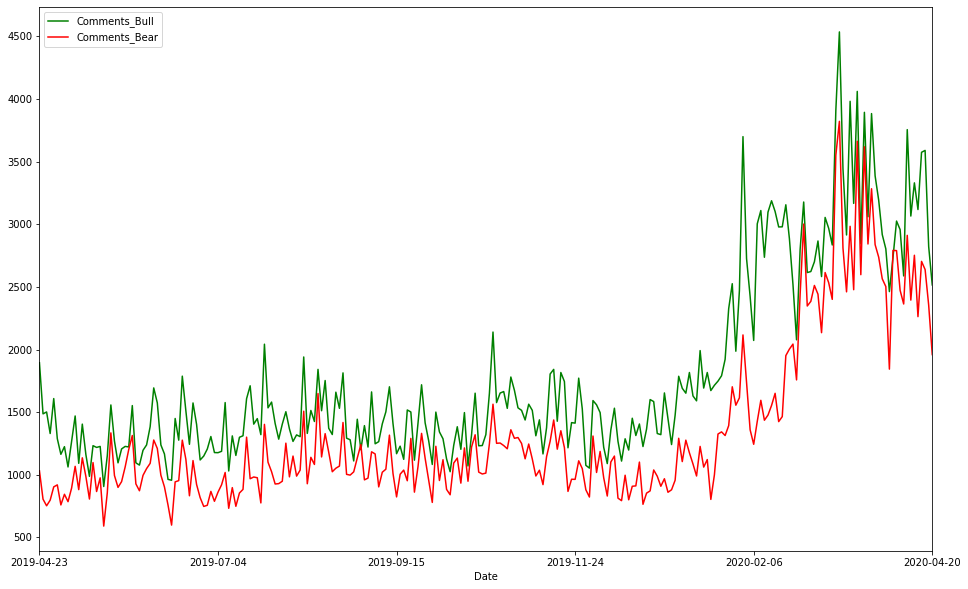

In [169]:

# gca stands for 'get current axis'
ax = plt.gca()

trading_df.plot(kind='line', y='Comments_Bull', color='green', ax=ax, figsize=(16, 10))
trading_df.plot(kind='line', y='Comments_Bear', color='red', ax=ax, figsize=(16, 10))

plt.show()

In [170]:
trading_df['Bull_Bear_Ratio'] = trading_df['Comments_Bull'] / trading_df['Comments_Bear']
trading_df.tail()

,Title_Bull,Title_Bear,Title_Pos,Title_Neg,Body_Bull,Body_Bear,Body_Pos,Body_Neg,Comments_Bull,Comments_Bear,Comments_Pos,Comments_Neg,Bull_Bear_Ratio
Date,,,,,,,,,,,,,
2020-04-14,7,5,2.294,0.943,38,38,0.760,1.062,3118,2263,1001.572,783.099,1.377817
2020-04-15,11,5,1.616,1.503,62,60,1.019,1.448,3575,2704,921.421,809.561,1.322115
2020-04-16,6,10,2.766,3.044,61,46,1.320,1.242,3590,2639,973.920,748.412,1.360364
2020-04-19,3,8,1.431,3.544,23,22,1.033,1.032,2823,2355,924.838,810.473,1.198726
2020-04-20,8,6,1.984,2.991,30,28,0.751,0.546,2516,1960,828.594,698.557,1.283673


In [171]:
trading_df.tail()

,Title_Bull,Title_Bear,Title_Pos,Title_Neg,Body_Bull,Body_Bear,Body_Pos,Body_Neg,Comments_Bull,Comments_Bear,Comments_Pos,Comments_Neg,Bull_Bear_Ratio
Date,,,,,,,,,,,,,
2020-04-14,7,5,2.294,0.943,38,38,0.760,1.062,3118,2263,1001.572,783.099,1.377817
2020-04-15,11,5,1.616,1.503,62,60,1.019,1.448,3575,2704,921.421,809.561,1.322115
2020-04-16,6,10,2.766,3.044,61,46,1.320,1.242,3590,2639,973.920,748.412,1.360364
2020-04-19,3,8,1.431,3.544,23,22,1.033,1.032,2823,2355,924.838,810.473,1.198726
2020-04-20,8,6,1.984,2.991,30,28,0.751,0.546,2516,1960,828.594,698.557,1.283673


In [172]:
spy = pd.read_csv('SPY.csv')
spy.set_index('Date', inplace=True)
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-23,290.679993,293.140015,290.420013,292.880005,287.015472,52246600
2019-04-24,292.790009,293.160004,292.070007,292.230011,286.378540,50392900
2019-04-25,292.119995,292.779999,290.730011,292.049988,286.202118,57770900
2019-04-26,292.100006,293.489990,291.239990,293.410004,287.534882,50916400
2019-04-29,293.510010,294.450012,293.410004,293.869995,287.985657,57197700


In [173]:
# Change the returns to a fraction (1.00 = 0% return)
start_price = spy.iloc[0]['Open']

spy['SPY Cumulative Return'] = spy['Close'] / start_price
spy.head()

,Open,High,Low,Close,Adj Close,Volume,SPY Cumulative Return
Date,,,,,,,
2019-04-23,290.679993,293.140015,290.420013,292.880005,287.015472,52246600,1.007569
2019-04-24,292.790009,293.160004,292.070007,292.230011,286.378540,50392900,1.005332
2019-04-25,292.119995,292.779999,290.730011,292.049988,286.202118,57770900,1.004713
2019-04-26,292.100006,293.489990,291.239990,293.410004,287.534882,50916400,1.009392
2019-04-29,293.510010,294.450012,293.410004,293.869995,287.985657,57197700,1.010974


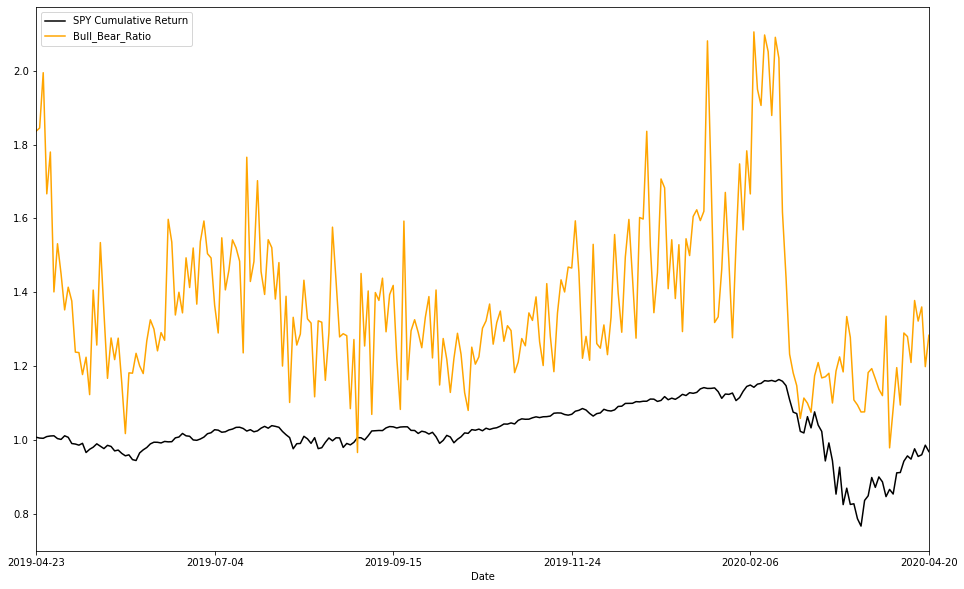

In [174]:
ax = spy.plot(kind='line', y='SPY Cumulative Return', color='black', figsize=(16, 10))
trading_df.plot(kind='line', y='Bull_Bear_Ratio', color='orange', ax = ax, figsize=(16, 10))
plt.show()

In [175]:
# Since there is a lot of noise in our bull_bear ratio, let's take the Exponential Moving Average.
trading_df['EMA_3'] = pd.Series.ewm(trading_df['Bull_Bear_Ratio'], span=3).mean()
trading_df['EMA_10'] = pd.Series.ewm(trading_df['Bull_Bear_Ratio'], span=10).mean()

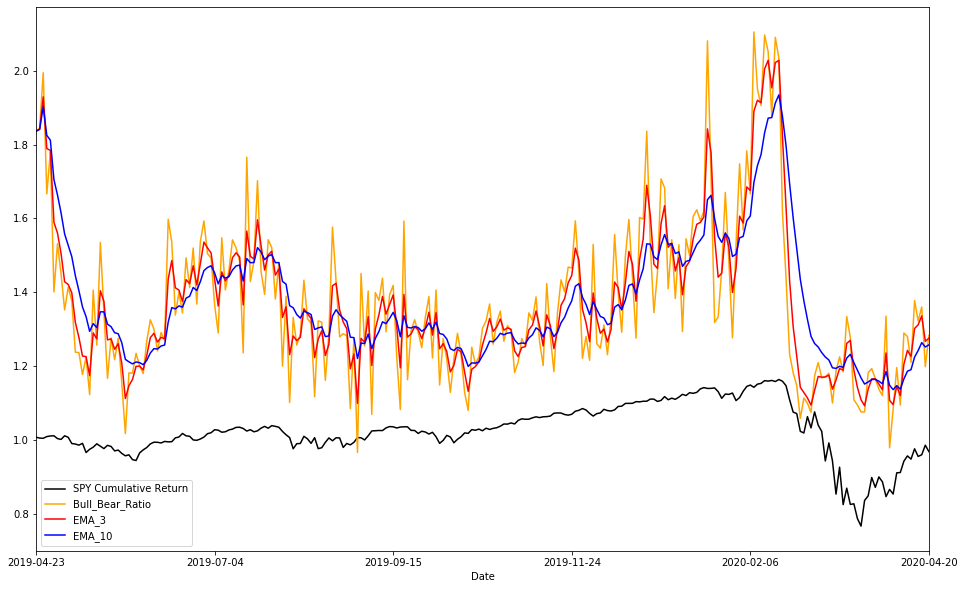

In [176]:
ax = spy.plot(kind='line', y='SPY Cumulative Return', color='black', figsize=(16, 10))
trading_df.plot(kind='line', y='Bull_Bear_Ratio', color='orange', ax = ax, figsize=(16, 10))
trading_df.plot(kind='line', y='EMA_3', color='red', ax = ax, figsize=(16, 10))
trading_df.plot(kind='line', y='EMA_10', color='blue', ax = ax, figsize=(16, 10))
plt.show()

In [177]:
trading_df.head()
        
    
    

,Title_Bull,Title_Bear,Title_Pos,Title_Neg,Body_Bull,Body_Bear,Body_Pos,Body_Neg,Comments_Bull,Comments_Bear,Comments_Pos,Comments_Neg,Bull_Bear_Ratio,EMA_3,EMA_10
Date,,,,,,,,,,,,,,,
2019-04-23,6,3,1.035,1.121,30,11,1.013,0.389,1895,1032,531.996,359.557,1.836240,1.836240,1.836240
2019-04-24,4,2,3.483,1.249,45,25,0.623,0.884,1487,806,435.778,305.913,1.844913,1.842022,1.841010
2019-04-25,5,0,2.991,1.651,6,0,0.341,0.203,1502,753,333.915,221.972,1.994688,1.929260,1.902788
2019-04-28,7,3,1.149,1.156,3,0,0.349,0.274,1330,798,383.922,285.132,1.666667,1.789210,1.824996
2019-04-29,8,7,2.514,1.414,0,0,0.074,0.271,1609,904,519.676,359.177,1.779867,1.784388,1.812041


In [178]:
# Given a date, get tomorrow's date.
def tomorrow_date(input_date):
    current_date = datetime.strptime(input_date, '%Y-%m-%d')
    next_day = current_date + timedelta(days=1)
    return next_day.strftime("%Y-%m-%d")

In [179]:
def wsb_backtest(input_df, ema, portfolio_value=10000): 
    # Idea, if the bull_bear ratio is over the 3 day EMA, then buy the next day at open.
    # Assume we have a $10,000 portfolio, and our gross leverage is limited to 1x.
    portfolio = portfolio_value
    cash = portfolio_value
    num_shares = 0
    
    portfolio_dict = {}
    
    for index, row in input_df.iterrows():
        
        next_trading_day = tomorrow_date(index)
        try:
            spy_next_open_price = spy.loc[next_trading_day]['Open']
            spy_next_close_price = spy.loc[next_trading_day]['Close']
        except:
            continue
            
        old_num_shares = num_shares
        action = 'No Trade'
        
        if row['Bull_Bear_Ratio'] > row[ema]: # Bullish Trend
            if num_shares <= 0: # We can buy shares. Otherwise, keep holding our shares.
                # First close out our existing positions (if we have a net short)
                close_short = num_shares * (-1)
                cash -= (close_short * spy_next_open_price)
                num_shares = 0
                # Now use the remaining cash we have to buy shares at tomorrow's open.
                num_shares = int(cash // spy_next_open_price)
                cash -= (num_shares * spy_next_open_price)
                
                shares_bought = num_shares - old_num_shares
                action = 'BUY ' + str(shares_bought) + ' shares'
        
        elif row['Bull_Bear_Ratio'] < row[ema]: # Bearish Trend
            if num_shares >= 0: # We can short shares. Otherwise, keep holding our short.
                # First, sell all our shares.
                cash += (num_shares * spy_next_open_price)
                num_shares = 0
                # Now, we can short up to 1x leverage.
                num_shares = -(int(cash // spy_next_open_price))
                cash += (-num_shares * spy_next_open_price)
                
                shares_sold = old_num_shares - num_shares
                action = 'SELL ' + str(shares_sold) + ' shares'
        else:
            pass
        
        # Now, update our portfolio value.
        holding_value = num_shares * spy_next_close_price
        portfolio = cash + holding_value
        
        net_profit = portfolio - portfolio_value
        profit_ratio = portfolio / portfolio_value
        
        portfolio_dict[next_trading_day] = [portfolio, cash, num_shares, net_profit, profit_ratio, action]
        
    # At the end, we return our portfolio value.
    profit_df = pd.DataFrame.from_dict(portfolio_dict, orient='index')
    profit_df.columns = ['Portfolio Value', 'Net Cash', 'Net Share Quantity', 'Net Profit', 'Profit Ratio', 'Action']
    return profit_df
                
                

In [180]:
profit_df_3 = wsb_backtest(trading_df, 'EMA_3')
profit_df_10 = wsb_backtest(trading_df, 'EMA_10')

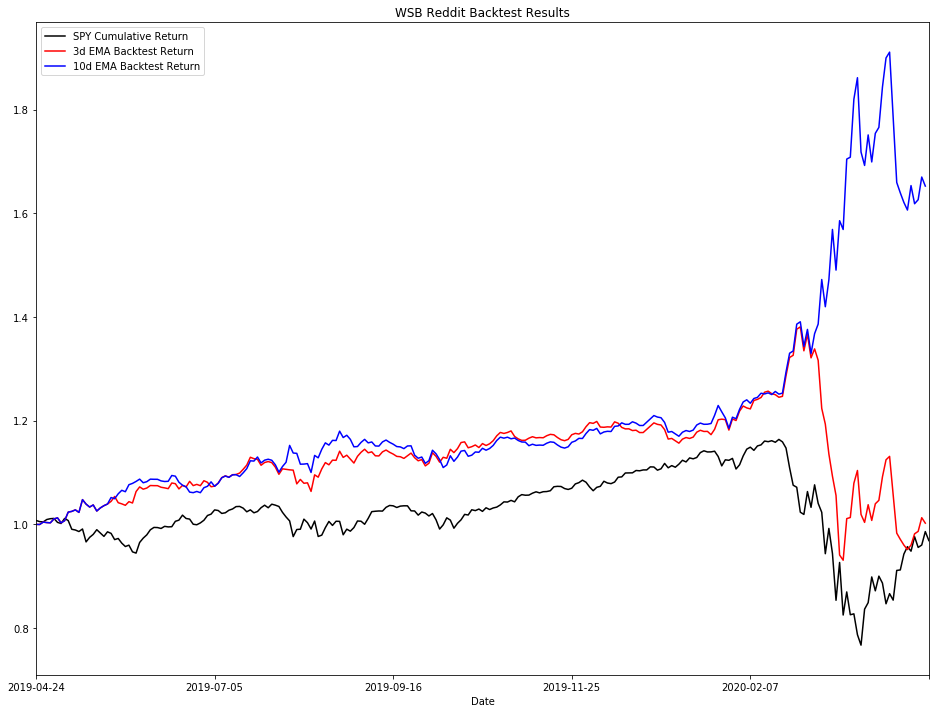

In [191]:
ax = spy.plot(kind='line', y='SPY Cumulative Return', color='black', figsize=(16, 12), 
              title='WSB Reddit Sentiment Backtest Results')
profit_df_3.plot(kind='line', y='Profit Ratio', color='red', ax = ax, figsize=(16, 12))
profit_df_10.plot(kind='line', y='Profit Ratio', color='blue', ax = ax, figsize=(16, 12))
#trading_df.plot(kind='line', y='Bull_Bear_Ratio', color='orange', ax = ax, figsize=(16, 12))
ax.legend(['SPY Cumulative Return','3d EMA Backtest Return', '10d EMA Backtest Return'])

plt.show()

In [192]:
# Now, test inversing WSB.
def inverse_wsb_backtest(input_df, ema, portfolio_value=10000): 
    # Idea, if the bull_bear ratio is over the 3 day EMA, then sell the next day at open.
    # Assume we have a $10,000 portfolio, and our gross leverage is limited to 1x.
    portfolio = portfolio_value
    cash = portfolio_value
    num_shares = 0
    
    portfolio_dict = {}
    
    for index, row in input_df.iterrows():
        
        next_trading_day = tomorrow_date(index)
        try:
            spy_next_open_price = spy.loc[next_trading_day]['Open']
            spy_next_close_price = spy.loc[next_trading_day]['Close']
        except:
            continue
            
        old_num_shares = num_shares
        action = 'No Trade'
        
        # The only difference here is that we want to inverse the actions of our previous backtest.
        # We just need to flip the comparison operator.
        if row['Bull_Bear_Ratio'] < row[ema]: 
            if num_shares <= 0: 
                close_short = num_shares * (-1)
                cash -= (close_short * spy_next_open_price)
                num_shares = 0
                num_shares = int(cash // spy_next_open_price)
                cash -= (num_shares * spy_next_open_price)
                
                shares_bought = num_shares - old_num_shares
                action = 'BUY ' + str(shares_bought) + ' shares'
        
        elif row['Bull_Bear_Ratio'] > row[ema]: 
            if num_shares >= 0: 
                cash += (num_shares * spy_next_open_price)
                num_shares = 0
                num_shares = -(int(cash // spy_next_open_price))
                cash += (-num_shares * spy_next_open_price)
                
                shares_sold = old_num_shares - num_shares
                action = 'SELL ' + str(shares_sold) + ' shares'
        else:
            pass
        
        holding_value = num_shares * spy_next_close_price
        portfolio = cash + holding_value
        
        net_profit = portfolio - portfolio_value
        profit_ratio = portfolio / portfolio_value
        
        portfolio_dict[next_trading_day] = [portfolio, cash, num_shares, net_profit, profit_ratio, action]
        
    # At the end, we return our portfolio value.
    profit_df = pd.DataFrame.from_dict(portfolio_dict, orient='index')
    profit_df.columns = ['Portfolio Value', 'Net Cash', 'Net Share Quantity', 'Net Profit', 'Profit Ratio', 'Action']
    return profit_df

In [193]:
inverse_profit_df_3 = inverse_wsb_backtest(trading_df, 'EMA_3')
inverse_profit_df_10 = inverse_wsb_backtest(trading_df, 'EMA_10')

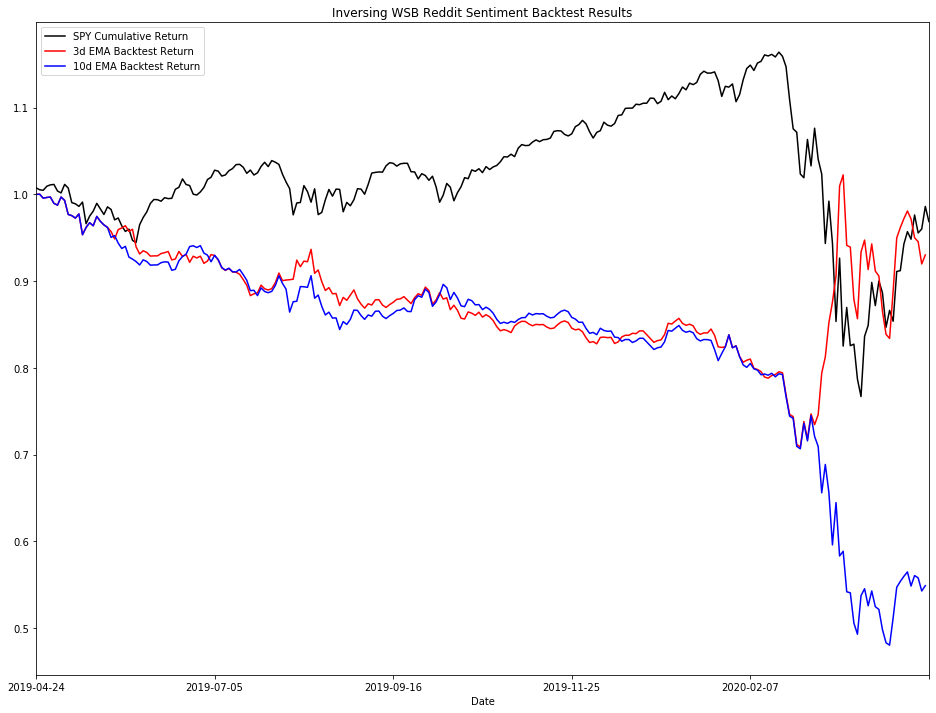

In [194]:
ax = spy.plot(kind='line', y='SPY Cumulative Return', color='black', figsize=(16, 12), 
              title='Inversing WSB Reddit Sentiment Backtest Results')
inverse_profit_df_3.plot(kind='line', y='Profit Ratio', color='red', ax = ax, figsize=(16, 12))
inverse_profit_df_10.plot(kind='line', y='Profit Ratio', color='blue', ax = ax, figsize=(16, 12))
#trading_df.plot(kind='line', y='Bull_Bear_Ratio', color='orange', ax = ax, figsize=(16, 12))
ax.legend(['SPY Cumulative Return','3d EMA Backtest Return', '10d EMA Backtest Return'])

plt.show()